In [2]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))

In [4]:
from data_preprocessing import *

In [5]:
# Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False) 

In [6]:
import datetime

# Age is the diffrence of the current date and the registration
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['RegistrationYear']
print(data['Age'])


0          20
1          20
2          20
3          20
4          20
           ..
1000093    11
1000094    11
1000095    11
1000096    11
1000097    11
Name: Age, Length: 1000098, dtype: int64


In [7]:
car_features = ['VehicleType_encoded', 'RegistrationYear', 'SumInsured']
owner_features = ['Gender_encoded', 'MaritalStatus_encoded']
location_features = ['Province_encoded', 'PostalCode_encoded']

# Assuming your dataset is named df
numerical_features = ['SumInsured', 'Age']  # Add any other numerical features here 
categorical_features = ['VehicleType', 'Gender', 'MaritalStatus', 'Province']  

# Impute missing values
df = impute_missing_values(data, numerical_features, categorical_features)

# List of columns to preserve
columns_to_preserve = ['SumInsured', 'Age', 'VehicleType', 'Gender', 'MaritalStatus', 'Province', 'TotalPremium']

# Create a new DataFrame with only the selected columns
df = df[columns_to_preserve]

df.head()

SumInsured   Age        VehicleType         Gender  MaritalStatus Province  \
0        0.01  20.0  Passenger Vehicle  Not specified  Not specified  Gauteng   
1        0.01  20.0  Passenger Vehicle  Not specified  Not specified  Gauteng   
2        0.01  20.0  Passenger Vehicle  Not specified  Not specified  Gauteng   
3   119300.00  20.0  Passenger Vehicle  Not specified  Not specified  Gauteng   
4   119300.00  20.0  Passenger Vehicle  Not specified  Not specified  Gauteng   

   TotalPremium  
0     21.929825  
1     21.929825  
2      0.000000  
3    512.848070  
4      0.000000

In [8]:
df = one_hot_encode(df, ['VehicleType', 'Gender', 'MaritalStatus', 'Province'])

In [9]:
# 2. Scale Numerical and Encoded Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['SumInsured', 'Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [10]:
from model import *

In [11]:
df.columns

Index(['SumInsured', 'Age', 'TotalPremium', 'VehicleType_Heavy Commercial',
       'VehicleType_Light Commercial', 'VehicleType_Medium Commercial',
       'VehicleType_Passenger Vehicle', 'Gender_Male', 'Gender_Not specified',
       'MaritalStatus_Not specified', 'MaritalStatus_Single',
       'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal',
       'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West',
       'Province_Northern Cape', 'Province_Western Cape'],
      dtype='object')

In [12]:
# Define X (features) and y (target)
X = df[['SumInsured', 'Age', 
        'VehicleType_Heavy Commercial', 'VehicleType_Light Commercial', 
        'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle', 
        'Gender_Male', 'Gender_Not specified', 
        'MaritalStatus_Not specified', 'MaritalStatus_Single', 
        'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 
        'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 
        'Province_Northern Cape', 'Province_Western Cape']]

# Assuming 'TotalPremium' is the target variable
y = df['TotalPremium']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)  # test_size=0.2 means 20% test data

In [13]:
X_train

SumInsured       Age  VehicleType_Heavy Commercial  \
448476   -0.395585  0.682338                         False   
629423   -0.398237  0.069103                         False   
293724   -0.395585 -1.157368                         False   
793115    2.914365  1.295574                         False   
120459    2.914365  0.069103                         False   
...            ...       ...                           ...   
259178    2.914365 -1.157368                         False   
365838   -0.397242  0.375720                         False   
131932   -0.398237  0.988956                         False   
671155   -0.395585 -1.157368                         False   
121958   -0.234811 -0.544133                         False   

        VehicleType_Light Commercial  VehicleType_Medium Commercial  \
448476                         False                          False   
629423                         False                          False   
293724                         False                          False   
793115                         False                          False   
120459                         False                          False   
...                              ...                            ...   
259178                         False                          False   
365838                         False                          False   
131932                         False                          False   
671155                         False                          False   
121958                         False                          False   

        VehicleType_Passenger Vehicle  Gender_Male  Gender_Not specified  \
448476                           True        False                  True   
629423                           True        False                  True   
293724                           True        False                  True   
793115                           True        False                  True   
120459                           True        False                  True   
...                               ...          ...                   ...   
259178                           True        False                  True   
365838                           True        False                  True   
131932                           True        False                  True   
671155                           True        False                  True   
121958                           True        False                  True   

        MaritalStatus_Not specified  MaritalStatus_Single  \
448476                         True                 False   
629423                         True                 False   
293724                         True                 False   
793115                         True                 False   
120459                         True                 False   
...                             ...                   ...   
259178                         True                 False   
365838                         True                 False   
131932                         True                 False   
671155                         True                 False   
121958                         True                 False   

        Province_Free State  Province_Gauteng  Province_KwaZulu-Natal  \
448476                False             False                   False   
629423                False              True                   False   
293724                False              True                   False   
793115                False             False                   False   
120459                False              True                   False   
...                     ...               ...                     ...   
259178                False              True                   False   
365838                False             False                   False   
131932                False              True                   False   
671155                False       

In [14]:
# Train models
lr_model, dt_model, rfr_model, xgb_model = train_models(X_train, y_train)

In [15]:

# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


# Display the evaluation results for each model
for i, model_name in enumerate(models):
    print(f"Evaluation results for {model_name}:")
    print(f"  - Mean Absolute Error (MAE): {mae_scores[i]}")
    print(f"  - Mean Squared Error (MSE): {mse_scores[i]}")
    print(f"  - R-squared (R2) Score: {r2_scores[i]}")
    print("\n")  # Adds a newline for readability between models


Evaluation results for Linear Regression:
  - Mean Absolute Error (MAE): 90.08427087289374
  - Mean Squared Error (MSE): 27162.380515172714
  - R-squared (R2) Score: 0.015434114610956229


Evaluation results for Decision Tree:
  - Mean Absolute Error (MAE): 44.27042949033005
  - Mean Squared Error (MSE): 11276.30890298778
  - R-squared (R2) Score: 0.5912630318690635


Evaluation results for Random Forest:
  - Mean Absolute Error (MAE): 44.292784804842135
  - Mean Squared Error (MSE): 11231.071709829292
  - R-squared (R2) Score: 0.5929027628605987


Evaluation results for XGBoost:
  - Mean Absolute Error (MAE): 51.1766185839616
  - Mean Squared Error (MSE): 12194.332986534275
  - R-squared (R2) Score: 0.5579870384736932




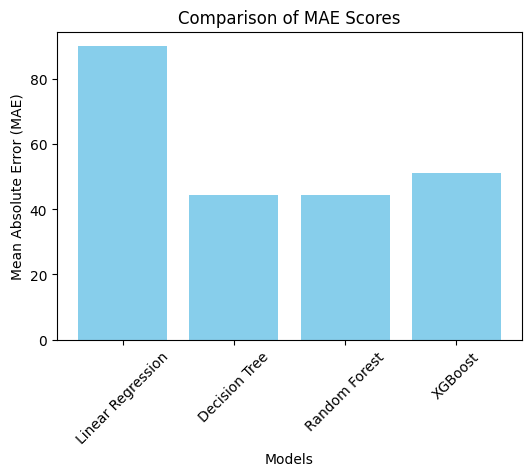

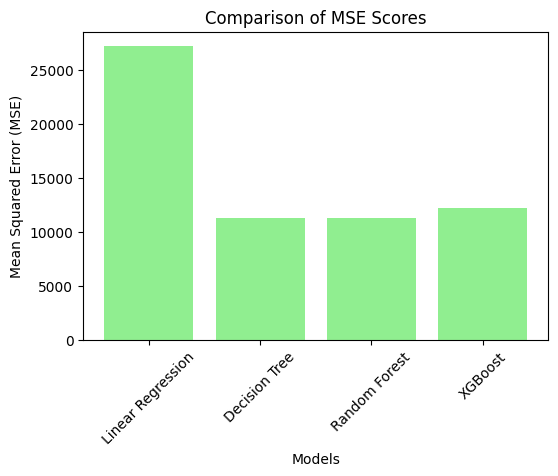

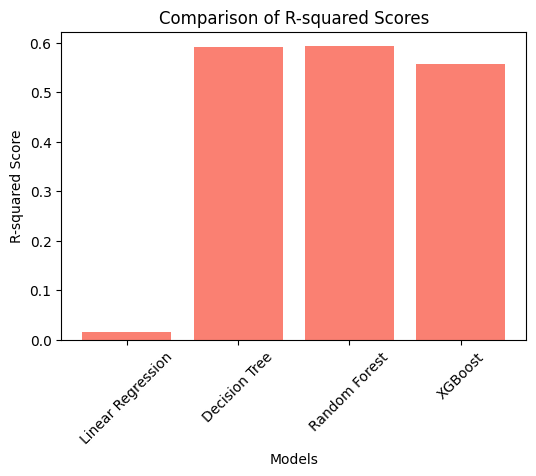

In [17]:
# Plot metrics
plot_metrics(models, mae_scores, mse_scores, r2_scores)

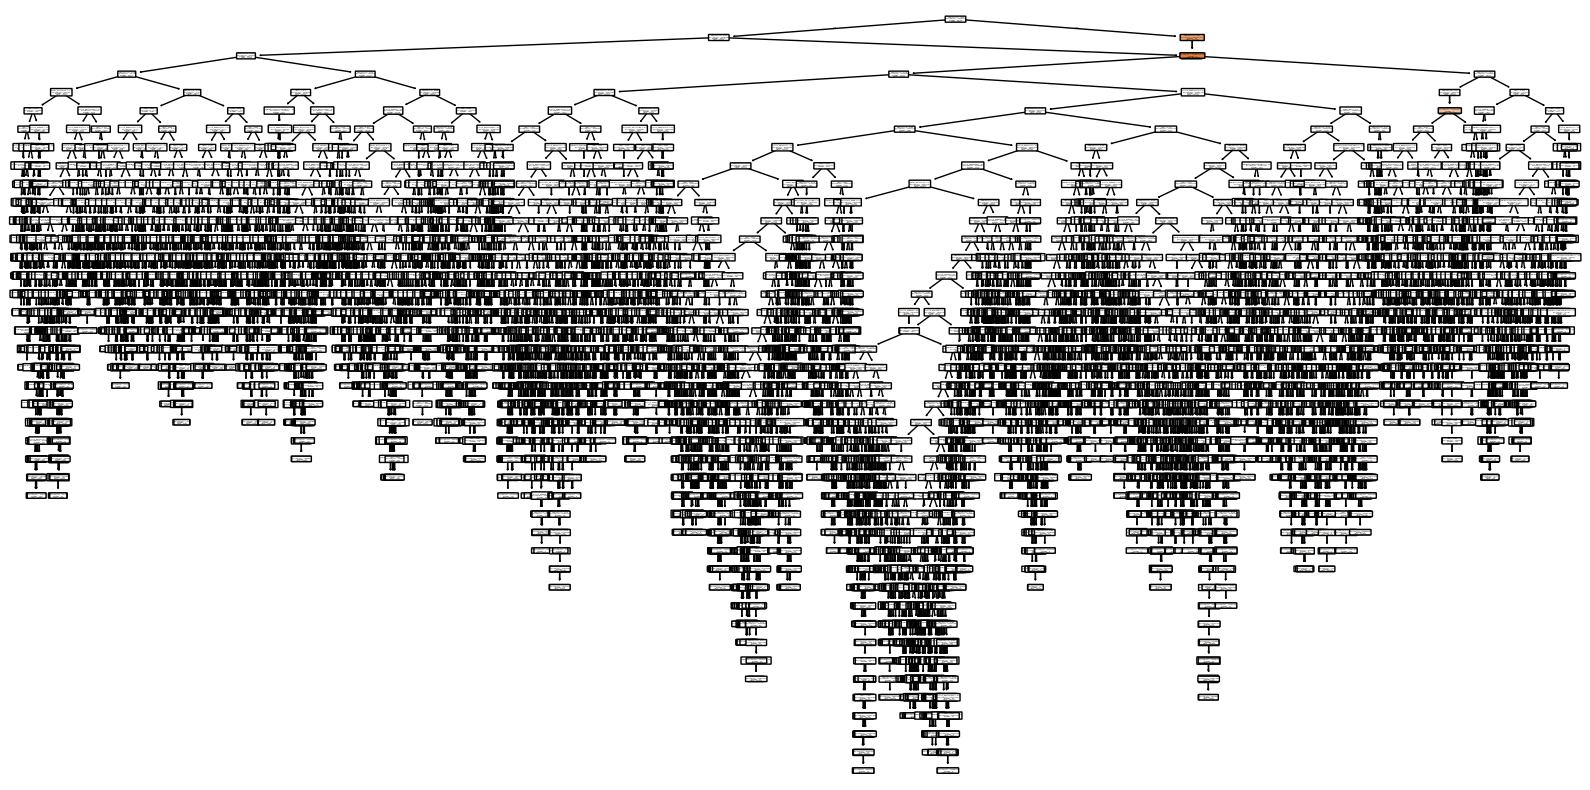

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
#single_tree = dt_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree= dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

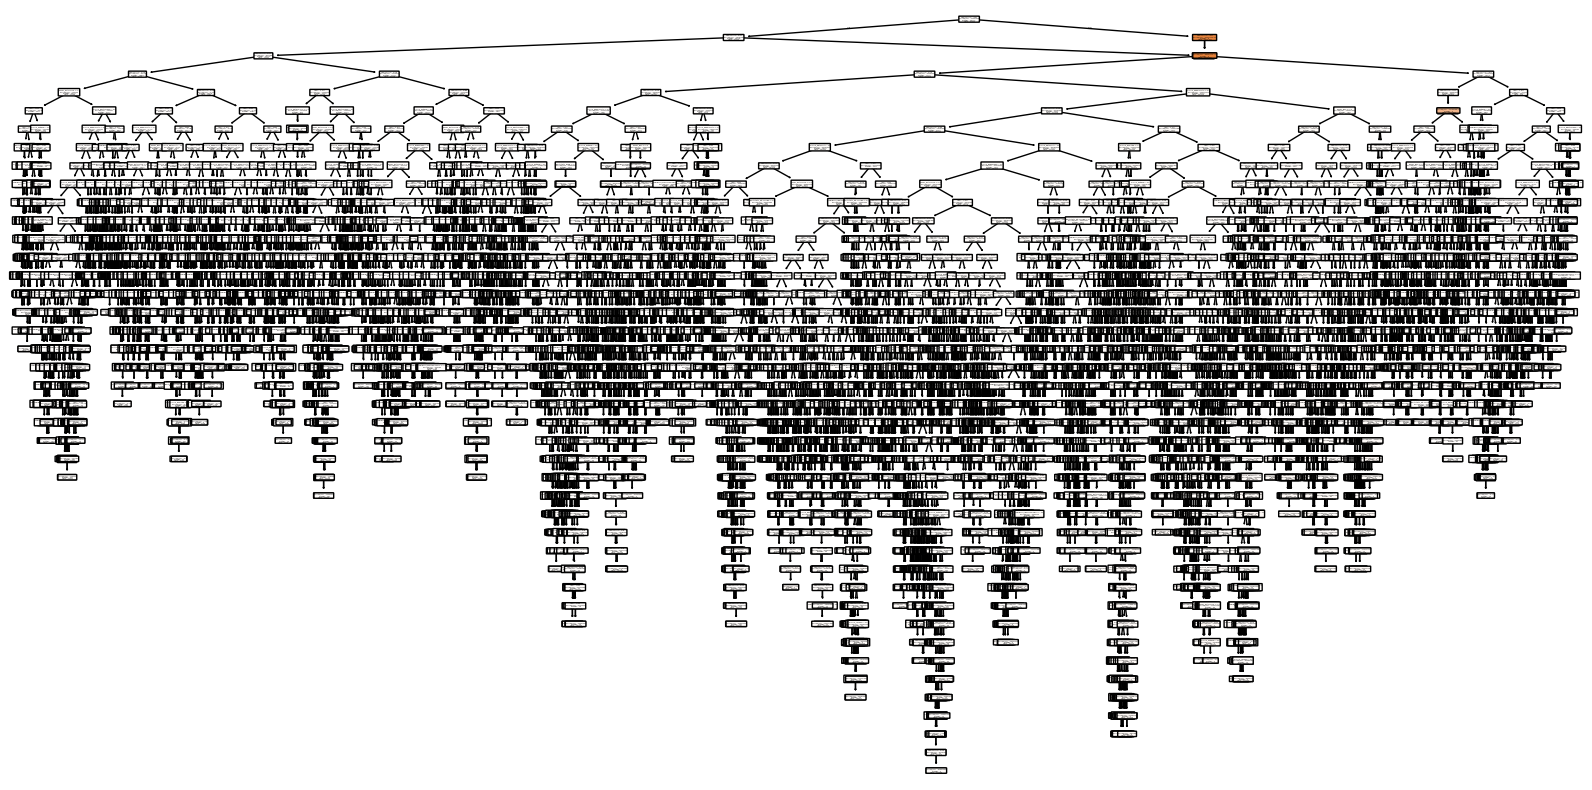

In [19]:

# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
single_tree = rfr_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

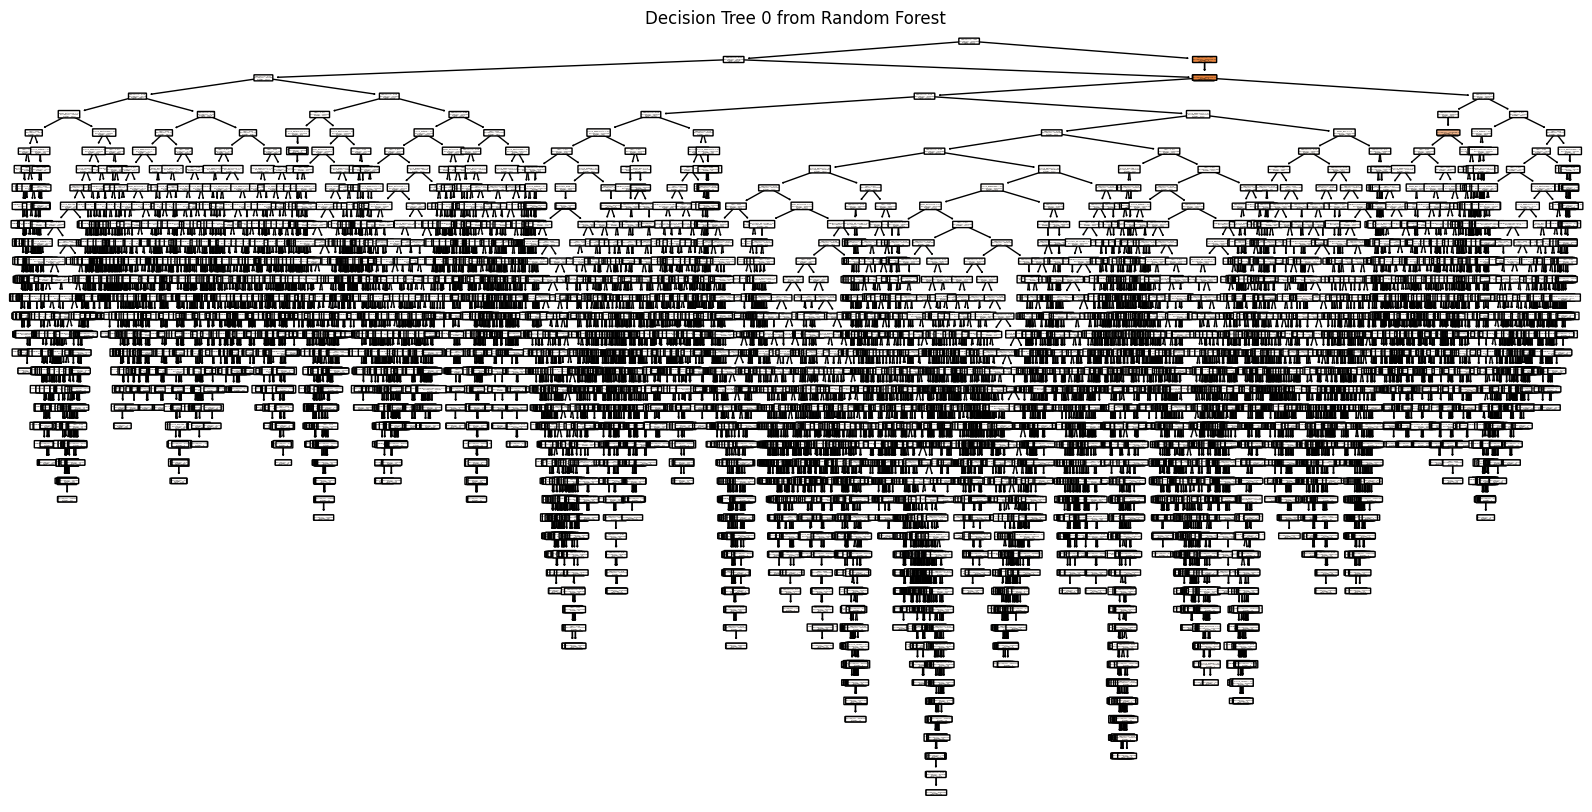

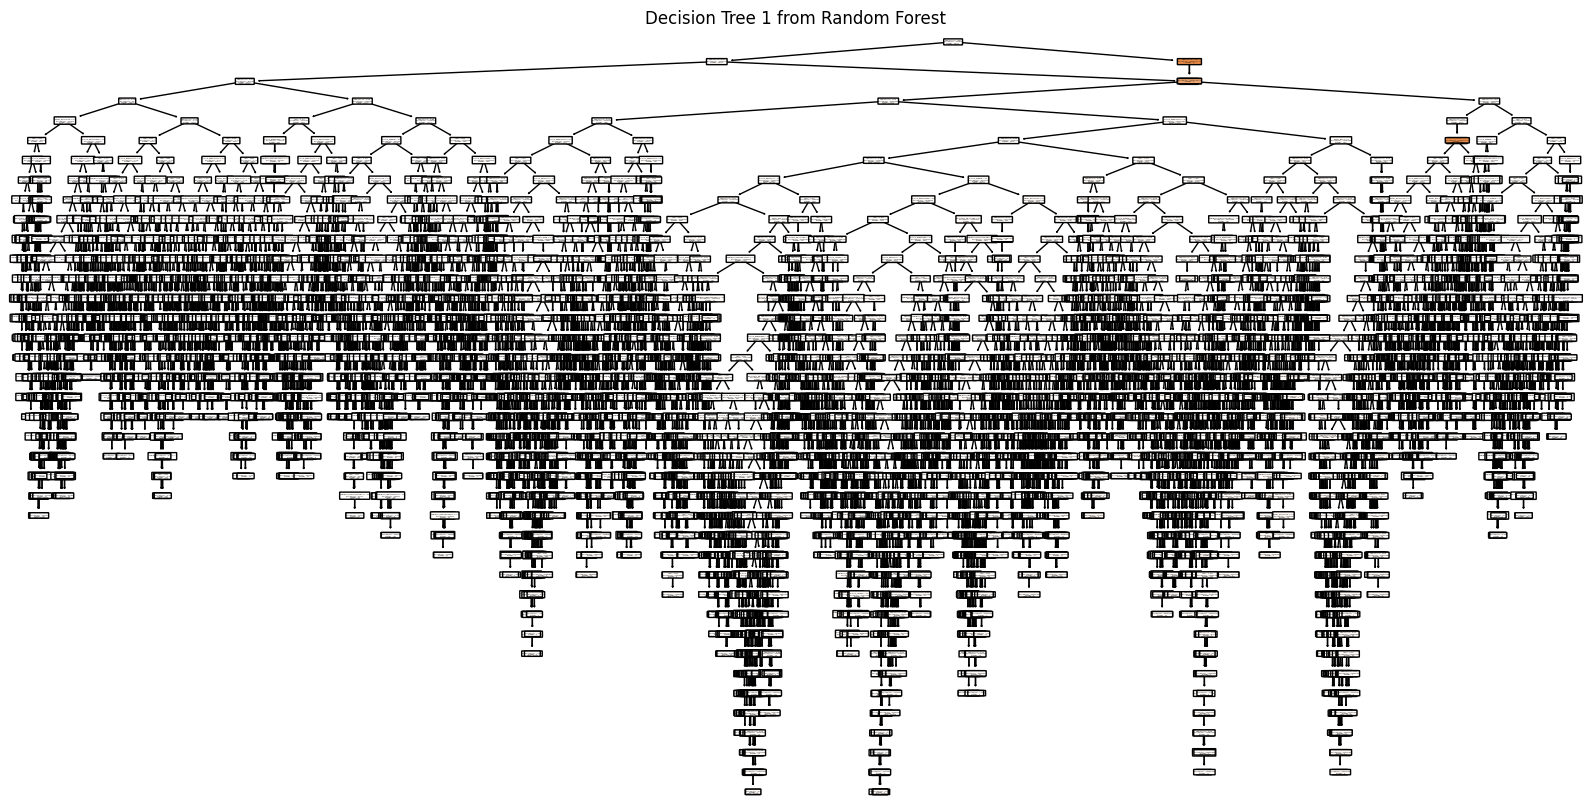

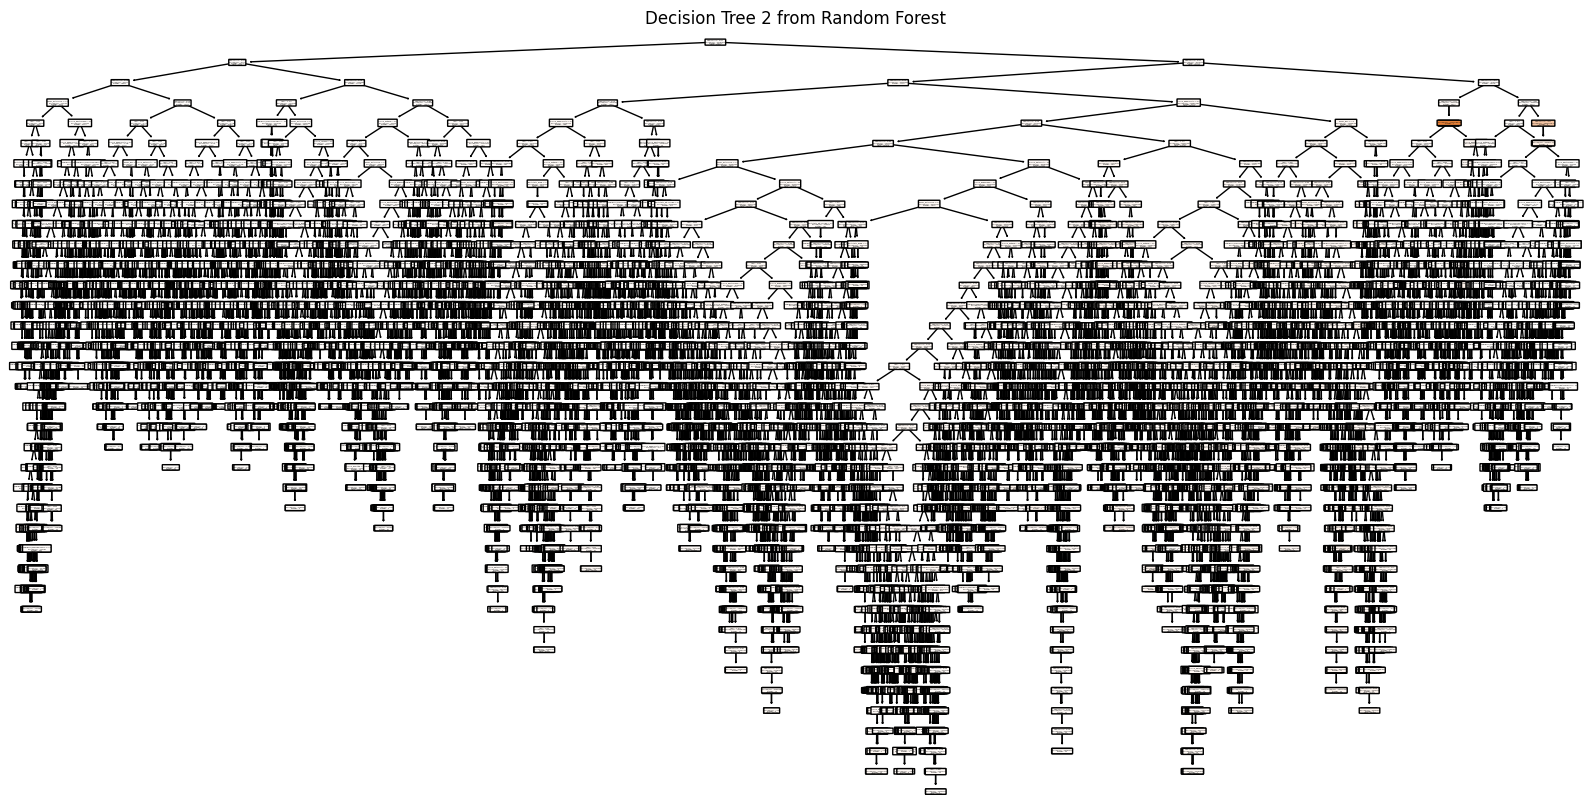

In [20]:
# Plot multiple trees from the Random Forest
for tree_index in range(3):  # Plot the first 3 trees
    single_tree = rfr_model.estimators_[tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {tree_index} from Random Forest")
    plt.show()


<Figure size 1000x600 with 0 Axes>

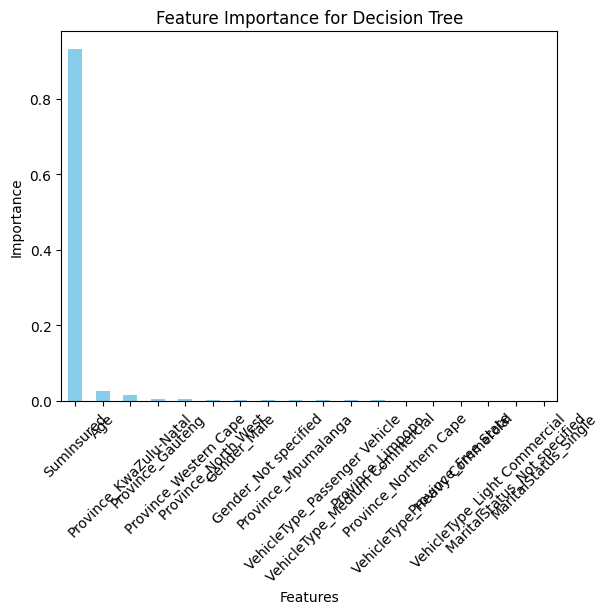

<Figure size 1000x600 with 0 Axes>

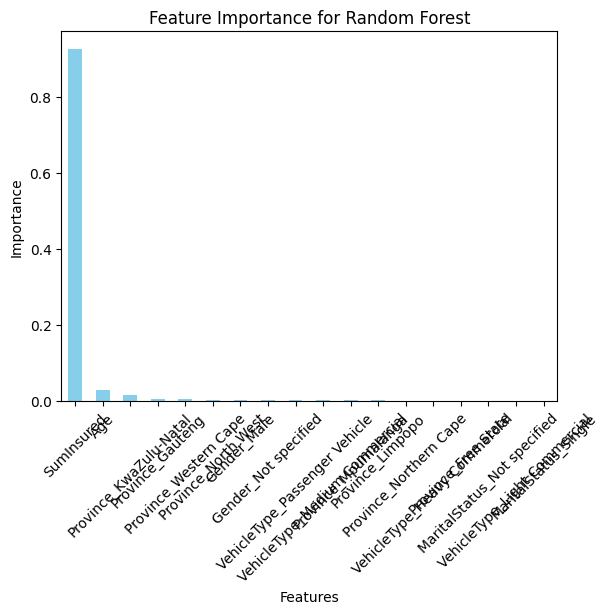

<Figure size 1000x600 with 0 Axes>

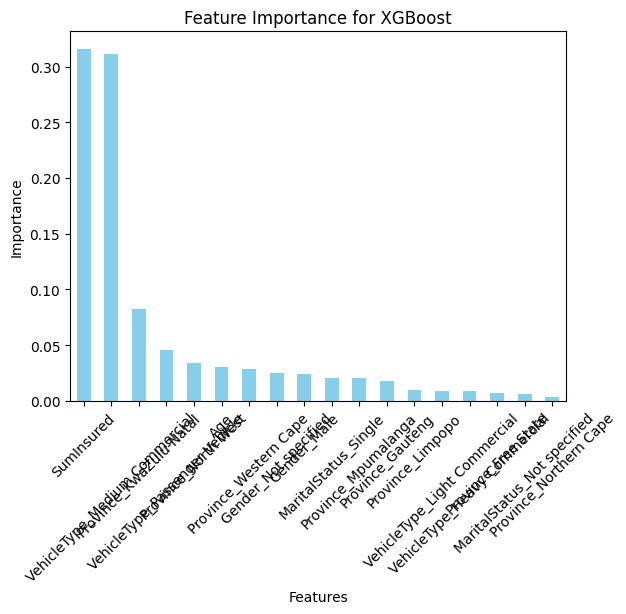

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    # Get feature importance
    feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

# Call the function for each model
plot_feature_importance(dt_model, X_train.columns, "Decision Tree")
plot_feature_importance(rfr_model, X_train.columns, "Random Forest")
plot_feature_importance(xgb_model, X_train.columns, "XGBoost")
